In [33]:




#CNN Model ChatGpt Dataset oversampling  ..........



import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# 1. Load and Preprocess the dataset
df = pd.read_csv('Non_Functional_Requirements.csv', encoding='latin1')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['comment_Text'] = df['comment_Text'].apply(clean_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['comment_Text'])
X = tokenizer.texts_to_sequences(df['comment_Text'])
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X = pad_sequences(X, padding='post', maxlen=maxlen)

y_dict = {'Usability': 0, 'Reliability': 1, 'Accuracy':2, 'Performance':3}
y = df['Multi'].map(y_dict)
y = pd.get_dummies(df['Multi']).values

# 2. Oversample to balance classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# 3. Define the CNN model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 4. K-Fold Cross-Validation
n_folds = 10
kfold = KFold(n_splits=n_folds, shuffle=True)
fold_no = 1
acc_per_fold = []

# Lists to store average accuracies across folds
avg_train_acc = []
avg_val_acc = []

for train, test in kfold.split(X_resampled, y_resampled):
    model = create_model()
    history = model.fit(X_resampled[train], y_resampled[train], validation_split=0.1, epochs=10, batch_size=32, verbose=0)
    
    avg_train_acc.append(history.history['accuracy'])
    avg_val_acc.append(history.history['val_accuracy'])

    scores = model.evaluate(X_resampled[test], y_resampled[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    fold_no += 1




d:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
# 5. Performance Metrics
print(f'> Average Accuracy across {n_folds}-folds: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)')



> Average Accuracy across 10-folds: 89.47% (+/- 1.10%)


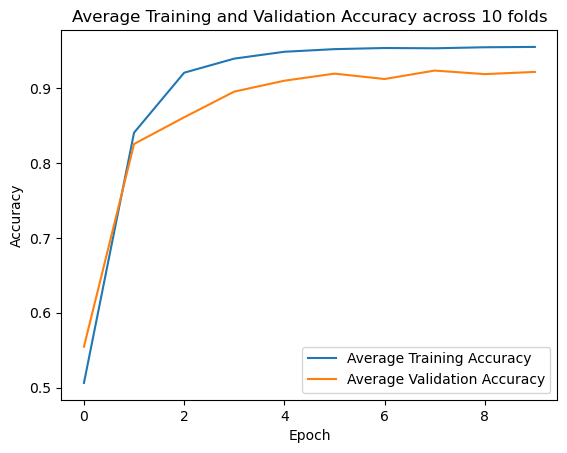

In [35]:
# Average Training and Validation Accuracy for 5 folds
plt.plot(np.mean(avg_train_acc, axis=0), label='Average Training Accuracy')
plt.plot(np.mean(avg_val_acc, axis=0), label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy across 10 folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


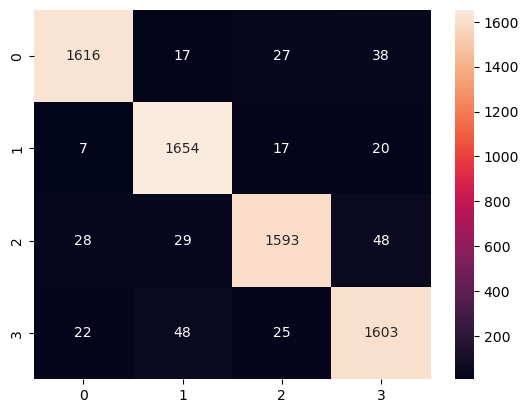

In [36]:

# Confusion Matrix
y_pred = model.predict(X_resampled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_resampled, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()



In [37]:
# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=list(y_dict.keys())))

              precision    recall  f1-score   support

   Usability       0.97      0.95      0.96      1698
 Reliability       0.95      0.97      0.96      1698
    Accuracy       0.96      0.94      0.95      1698
 Performance       0.94      0.94      0.94      1698

    accuracy                           0.95      6792
   macro avg       0.95      0.95      0.95      6792
weighted avg       0.95      0.95      0.95      6792



In [38]:







#CNN Model ChatGpt Dataset undersampling  ..........
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler for undersampling

# 1. Load and Preprocess the dataset
df = pd.read_csv('Non_Functional_Requirements.csv', encoding='latin1')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['comment_Text'] = df['comment_Text'].apply(clean_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['comment_Text'])
X = tokenizer.texts_to_sequences(df['comment_Text'])
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X = pad_sequences(X, padding='post', maxlen=maxlen)

y_dict = {'Usability': 0, 'Reliability': 1, 'Accuracy':2, 'Performance':3}
y = df['Multi'].map(y_dict)
y = pd.get_dummies(df['Multi']).values

# 2. Undersample to balance classes
undersampler = RandomUnderSampler(random_state=42)  # Use RandomUnderSampler for undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Rest of the code remains the same
# Define the CNN model, K-Fold Cross-Validation, and Performance Metrics
# ...

# 3. Define the CNN model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 4. K-Fold Cross-Validation
n_folds = 10
kfold = KFold(n_splits=n_folds, shuffle=True)
fold_no = 1
acc_per_fold = []

# Lists to store average accuracies across folds
avg_train_acc = []
avg_val_acc = []

for train, test in kfold.split(X_resampled, y_resampled):
    model = create_model()
    history = model.fit(X_resampled[train], y_resampled[train], validation_split=0.1, epochs=10, batch_size=32, verbose=0)
    
    avg_train_acc.append(history.history['accuracy'])
    avg_val_acc.append(history.history['val_accuracy'])

    scores = model.evaluate(X_resampled[test], y_resampled[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    fold_no += 1


d:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
# 5. Performance Metrics
print(f'> Average Accuracy across {n_folds}-folds: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)')


> Average Accuracy across 10-folds: 44.28% (+/- 3.70%)


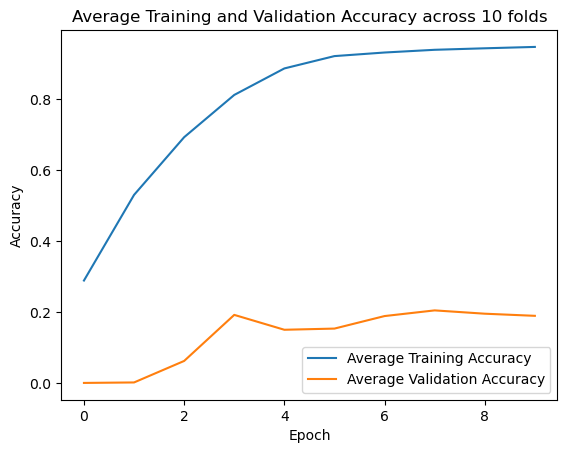

In [40]:
# Average Training and Validation Accuracy for 5 folds
plt.plot(np.mean(avg_train_acc, axis=0), label='Average Training Accuracy')
plt.plot(np.mean(avg_val_acc, axis=0), label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy across 10 folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


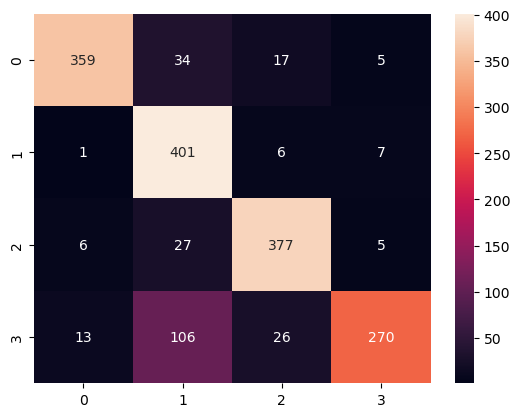

In [41]:
# Confusion Matrix
y_pred = model.predict(X_resampled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_resampled, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()


In [42]:
# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=list(y_dict.keys())))

              precision    recall  f1-score   support

   Usability       0.95      0.87      0.90       415
 Reliability       0.71      0.97      0.82       415
    Accuracy       0.88      0.91      0.90       415
 Performance       0.94      0.65      0.77       415

    accuracy                           0.85      1660
   macro avg       0.87      0.85      0.85      1660
weighted avg       0.87      0.85      0.85      1660



d:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
d:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


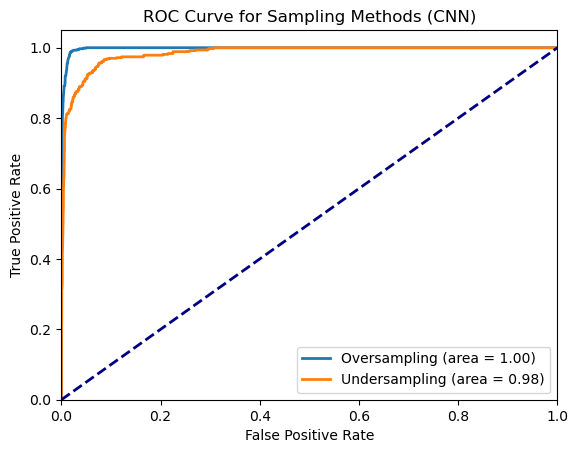

In [43]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Load and preprocess the dataset
df = pd.read_csv('Non_Functional_Requirements.csv', encoding='latin1')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['comment_Text'] = df['comment_Text'].apply(clean_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['comment_Text'])

X = tokenizer.texts_to_sequences(df['comment_Text'])
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X = pad_sequences(X, padding='post', maxlen=maxlen)

# Define class labels, oversampling, and undersampling
y_dict = {'Usability': 0, 'Reliability': 1, 'Accuracy':2, 'Performance':3}
y = df['Multi'].map(y_dict)
y = pd.get_dummies(df['Multi']).values

oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Define the CNN model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model for oversampling
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
model_oversampling = create_model()
model_oversampling.fit(X_oversampled, y_oversampled, epochs=10, batch_size=32, verbose=0)

# Train and evaluate the model for undersampling
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
model_undersampling = create_model()
model_undersampling.fit(X_undersampled, y_undersampled, epochs=10, batch_size=32, verbose=0)

# Function to plot ROC curve and calculate AUC
def plot_roc_auc(models, X, y, titles):
    plt.figure()
    for model, title in zip(models, titles):
        y_pred = model.predict(X)
        fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{title} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Sampling Methods (CNN)')
    plt.legend(loc='lower right')
    plt.show()

# Plot both ROC curves on the same diagram
plot_roc_auc([model_oversampling, model_undersampling], X_oversampled, y_oversampled[:, 1], titles=['Oversampling', 'Undersampling'])


d:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
d:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


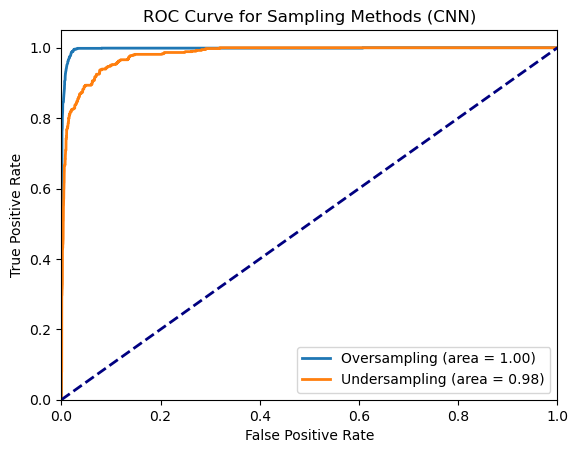

In [44]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Load and preprocess the dataset
df = pd.read_csv('Non_Functional_Requirements.csv', encoding='latin1')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['comment_Text'] = df['comment_Text'].apply(clean_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['comment_Text'])

X = tokenizer.texts_to_sequences(df['comment_Text'])
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X = pad_sequences(X, padding='post', maxlen=maxlen)

# Define class labels, oversampling, and undersampling
y_dict =  {'Usability': 0, 'Reliability': 1, 'Accuracy':2, 'Performance':3}
y = df['Multi'].map(y_dict)
y = pd.get_dummies(df['Multi']).values

oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Define the CNN model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model for oversampling
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
model_oversampling = create_model()
model_oversampling.fit(X_oversampled, y_oversampled, epochs=10, batch_size=32, verbose=0)

# Train and evaluate the model for undersampling
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
model_undersampling = create_model()
model_undersampling.fit(X_undersampled, y_undersampled, epochs=10, batch_size=32, verbose=0)

# Function to plot ROC curve and calculate AUC
def plot_roc_auc(models, X, y, titles):
    plt.figure()
    for model, title in zip(models, titles):
        y_pred = model.predict(X)
        fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{title} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Sampling Methods (CNN)')
    plt.legend(loc='lower right')
    plt.show()

# Plot both ROC curves on the same diagram
plot_roc_auc([model_oversampling, model_undersampling], X_oversampled, y_oversampled[:, 1], titles=['Oversampling', 'Undersampling'])


In [45]:





#new Ex :









#CNN Model ChatGpt Dataset oversampling  ..........



import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# 1. Load and Preprocess the dataset
df = pd.read_csv('Non_Functional_Requirements.csv', encoding='latin1')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['comment_Text'] = df['comment_Text'].apply(clean_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['comment_Text'])
X = tokenizer.texts_to_sequences(df['comment_Text'])
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X = pad_sequences(X, padding='post', maxlen=maxlen)

y_dict =  {'Usability': 0, 'Reliability': 1, 'Accuracy':2, 'Performance':3}
y = df['Multi'].map(y_dict)
y = pd.get_dummies(df['Multi']).values

# 2. Oversample to balance classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# 3. Define the CNN model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 4. K-Fold Cross-Validation
n_folds = 10
kfold = KFold(n_splits=n_folds, shuffle=True)
fold_no = 1
acc_per_fold = []

# Lists to store average accuracies across folds
avg_train_acc = []
avg_val_acc = []

for train, test in kfold.split(X_resampled, y_resampled):
    model = create_model()
    history = model.fit(X_resampled[train], y_resampled[train], validation_split=0.1, epochs=10, batch_size=32, verbose=0)
    
    avg_train_acc.append(history.history['accuracy'])
    avg_val_acc.append(history.history['val_accuracy'])

    scores = model.evaluate(X_resampled[test], y_resampled[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    fold_no += 1




d:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [46]:
# 5. Performance Metrics
print(f'> Average Accuracy across {n_folds}-folds: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)')



> Average Accuracy across 10-folds: 89.90% (+/- 0.89%)


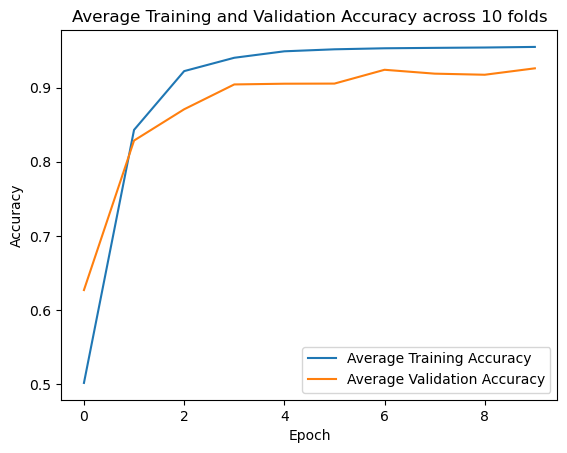

In [47]:
# Average Training and Validation Accuracy for 5 folds
plt.plot(np.mean(avg_train_acc, axis=0), label='Average Training Accuracy')
plt.plot(np.mean(avg_val_acc, axis=0), label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy across 10 folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [48]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

d:\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


> Average Accuracy across 10-folds: 89.83% (+/- 1.10%)


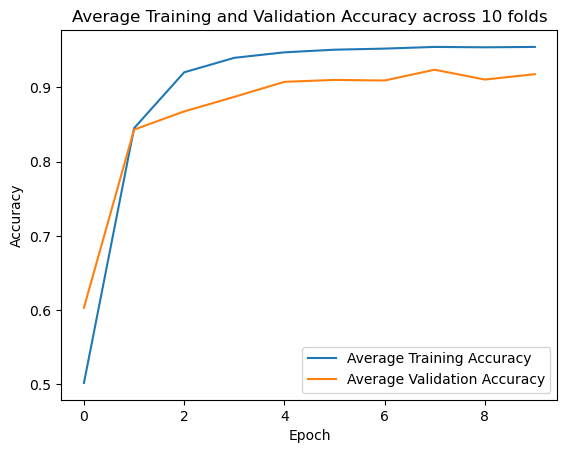

In [49]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# 1. Load and Preprocess the dataset
df = pd.read_csv('Non_Functional_Requirements.csv', encoding='latin1')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['comment_Text'] = df['comment_Text'].apply(clean_text)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['comment_Text'])
X = tokenizer.texts_to_sequences(df['comment_Text'])
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X = pad_sequences(X, padding='post', maxlen=maxlen)

y_dict = {'Usability': 0, 'Reliability': 1, 'Accuracy':2, 'Performance':3}
y = df['Multi'].map(y_dict)
y = pd.get_dummies(df['Multi']).values

# 2. Oversample to balance classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# 3. Define the CNN model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 4. K-Fold Cross-Validation
n_folds = 10
kfold = KFold(n_splits=n_folds, shuffle=True)
fold_no = 1
acc_per_fold = []

# Lists to store average accuracies across folds
avg_train_acc = []
avg_val_acc = []

for train, test in kfold.split(X_resampled, y_resampled):
    model = create_model()
    history = model.fit(X_resampled[train], y_resampled[train], validation_split=0.1, epochs=10, batch_size=32, verbose=0)
    
    avg_train_acc.append(history.history['accuracy'])
    avg_val_acc.append(history.history['val_accuracy'])

    scores = model.evaluate(X_resampled[test], y_resampled[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    fold_no += 1


# 5. Performance Metrics
print(f'> Average Accuracy across {n_folds}-folds: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)')

# Average Training and Validation Accuracy for 5 folds
plt.plot(np.mean(avg_train_acc, axis=0), label='Average Training Accuracy')
plt.plot(np.mean(avg_val_acc, axis=0), label='Average Validation Accuracy')
plt.title('Average Training and Validation Accuracy across 10 folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


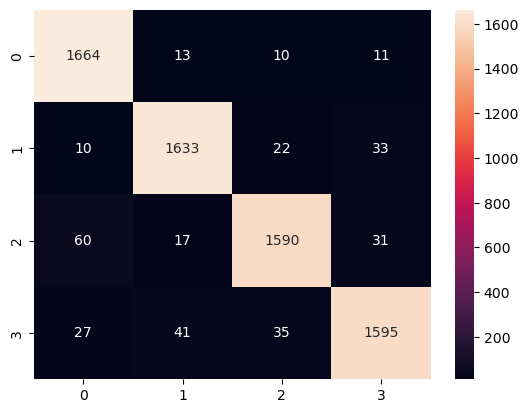

In [50]:
# Confusion Matrix
y_pred = model.predict(X_resampled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_resampled, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

# ROC Curve
n_classes = len(y_dict)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_resampled[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



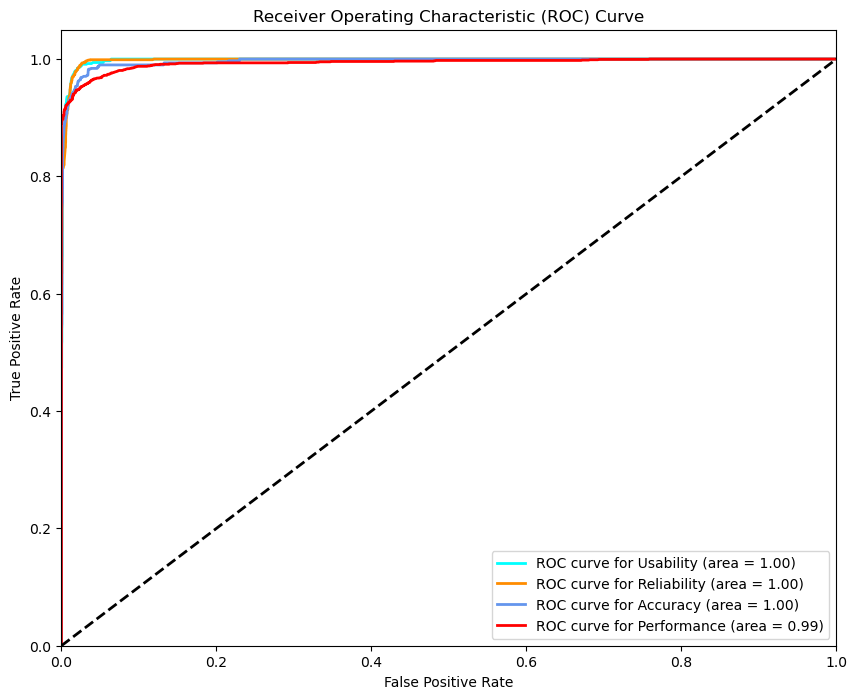

In [51]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'purple', 'pink']
for i in range(n_classes):

    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve for {list(y_dict.keys())[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()



In [52]:
# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=list(y_dict.keys())))

              precision    recall  f1-score   support

   Usability       0.94      0.98      0.96      1698
 Reliability       0.96      0.96      0.96      1698
    Accuracy       0.96      0.94      0.95      1698
 Performance       0.96      0.94      0.95      1698

    accuracy                           0.95      6792
   macro avg       0.95      0.95      0.95      6792
weighted avg       0.95      0.95      0.95      6792

